<a href="https://colab.research.google.com/github/chouhlaoui/CognoRise-InfoTech/blob/main/Personality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data analysis/CognoRise /Customer Personality Analysis/marketing_campaign.csv',sep='\t')

In [ ]:
df.shape

(2240, 29)

In [ ]:
pd.set_option("display.max_columns", None)

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df.describe(include='object')

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [ ]:
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
df.duplicated().sum()

0

<Axes: xlabel='Income', ylabel='Count'>

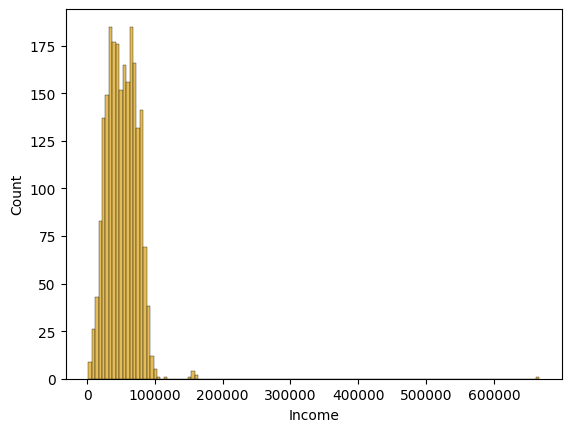

In [ ]:
sns.histplot(data=df, x="Income", color="goldenrod")


In [ ]:
df[df['Income']==df['Income'].max()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0


<Axes: >

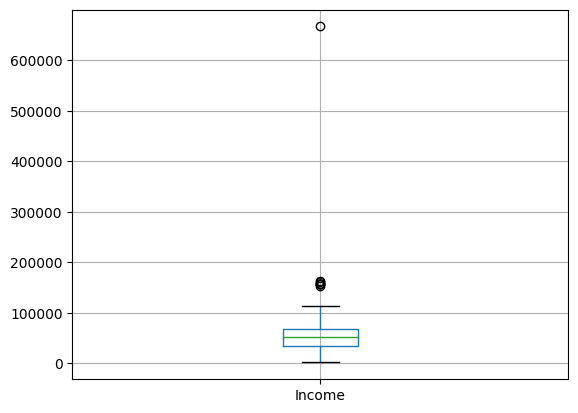

In [ ]:
df.boxplot(column='Income')

We have an extreme value of income which may affect our analysis, and we have some missing values.
The decision was to **fill** the missing with the mean value of Income and **Drop** the extreme value.

In [ ]:
df['Income'].fillna(df['Income'].mean(),inplace=True)

In [ ]:
df['Income'].isnull().sum()

0

In [ ]:
df = df[df['Income'] != df['Income'].max()]

In [ ]:
df.shape

(2239, 29)

<Axes: >

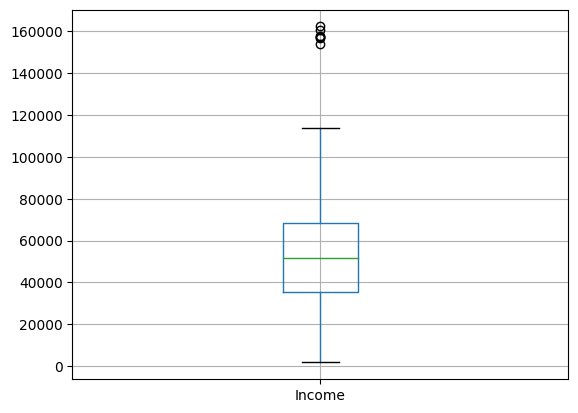

In [ ]:
df.boxplot(column='Income')

<Axes: xlabel='Income', ylabel='Count'>

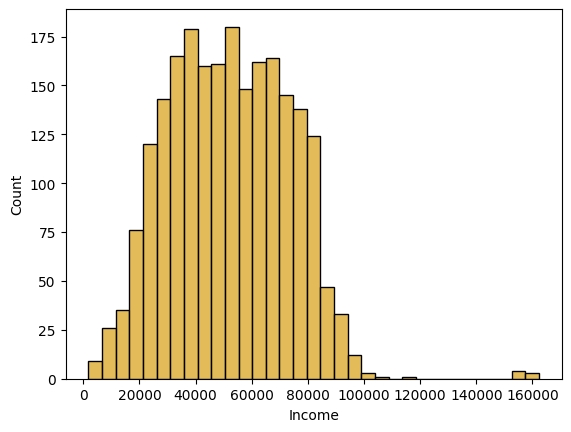

In [ ]:
sns.histplot(data=df, x="Income", color="goldenrod")

In [ ]:
for i in df.columns:
  print(i)
  print(df[i].nunique())
  print(df[i].unique())
  print('***********************\n')

ID
2239
[5524 2174 4141 ... 7270 8235 9405]
***********************

Year_Birth
59
[1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]
***********************

Education
5
['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
***********************

Marital_Status
8
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
***********************

Income
1974
[58138. 46344. 71613. ... 56981. 69245. 52869.]
***********************

Kidhome
3
[0 1 2]
***********************

Teenhome
3
[0 1 2]
***********************

Dt_Customer
663
['04-09-2012' '08-03-2014' '21-08-2013' '10-02-2014' '19-01-2014'
 '09-09-2013' '13-11-2012' '08-05-2013' '06-06-2013' '13-03-2014'
 '15-11-2013' '10-10-2012' '24-11-2012' '24-12-2012' '31-08-2012'
 '

In [ ]:
df.drop(['Z_CostContact','Z_Revenue'],axis=1,inplace=True)

In [ ]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2239 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2239 non-null   int64         
 1   Year_Birth           2239 non-null   int64         
 2   Education            2239 non-null   object        
 3   Marital_Status       2239 non-null   object        
 4   Income               2239 non-null   float64       
 5   Kidhome              2239 non-null   int64         
 6   Teenhome             2239 non-null   int64         
 7   Dt_Customer          2239 non-null   datetime64[ns]
 8   Recency              2239 non-null   int64         
 9   MntWines             2239 non-null   int64         
 10  MntFruits            2239 non-null   int64         
 11  MntMeatProducts      2239 non-null   int64         
 12  MntFishProducts      2239 non-null   int64         
 13  MntSweetProducts     2239 non-null   i

# **Data Visualization**

# Year of birth cleaning

<Axes: >

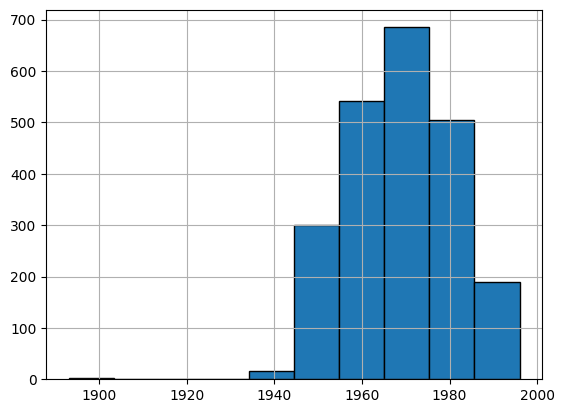

In [ ]:
df['Year_Birth'].hist(edgecolor='black')

Most of our customers were born between the early 40s and late 90s so we remove the rest.

In [ ]:
df = df[df['Year_Birth']>=1940]

<Axes: >

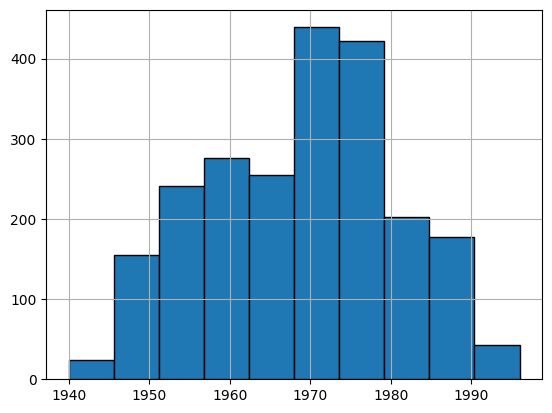

In [ ]:
df['Year_Birth'].hist(edgecolor='black')

# Marital situation


<BarContainer object of 8 artists>

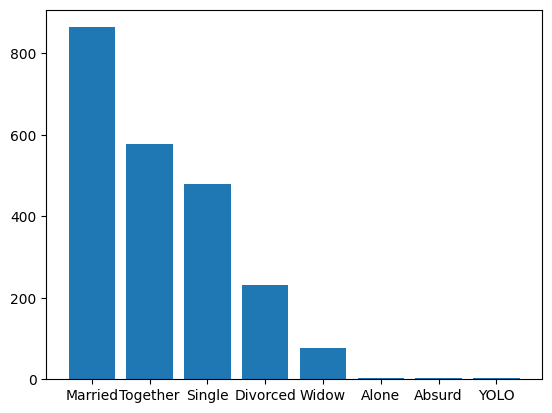

In [ ]:
plt.bar(df['Marital_Status'].value_counts().index,df['Marital_Status'].value_counts())

In [ ]:
df['Marital_Status'].replace(['YOLO','Divorced','Widow','Absurd','Alone'],'Single',inplace=True)

In [ ]:
df['Marital_Status'].replace(['Married','Together'],'In Couple',inplace=True)

<BarContainer object of 2 artists>

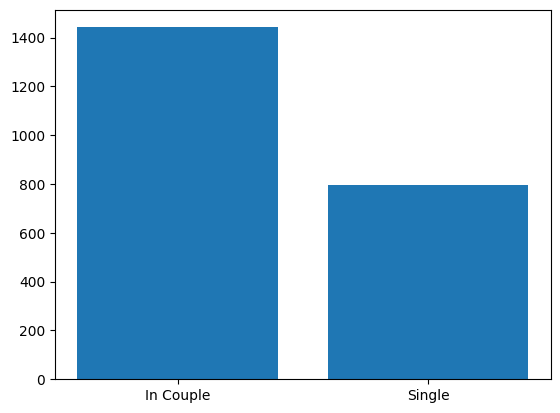

In [ ]:
plt.bar(df['Marital_Status'].value_counts().index,df['Marital_Status'].value_counts())

#  Education


<BarContainer object of 5 artists>

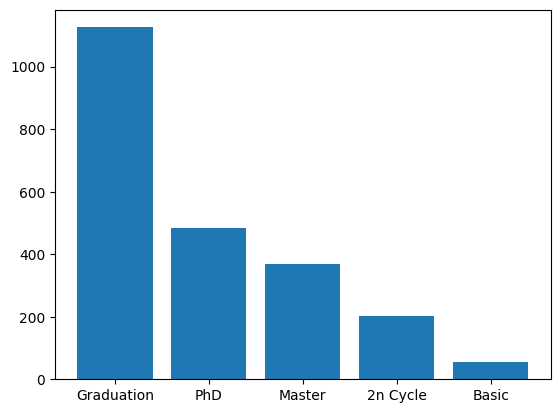

In [ ]:
plt.bar(df['Education'].value_counts().index,df['Education'].value_counts())

In [ ]:
df['Education']=df['Education'].replace({'Basic':'Undergraduate','2n Cycle':'Undergraduate','Graduation':'Postgraduate','Master':'Postgraduate','PhD':'Postgraduate'})


<BarContainer object of 2 artists>

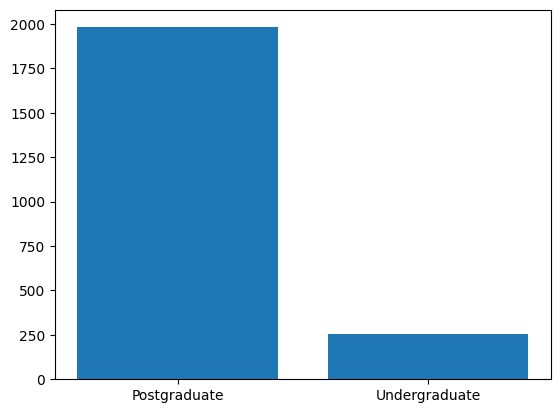

In [ ]:
plt.bar(df['Education'].value_counts().index,df['Education'].value_counts())

# Analysis

In [ ]:
df['Spent'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']

In [ ]:
df['Num_Products_purchased'] = df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

In [ ]:
df['Years_of_fidelity'] = pd.to_datetime('today').year - df['Dt_Customer'].dt.year

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Spent',
       'Num_Products_purchased', 'Years_of_fidelity'],
      dtype='object')

In [ ]:
Store_data = df[['Income', 'Years_of_fidelity' , 'Recency', 'NumDealsPurchases', 'NumWebPurchases',
        'NumWebVisitsMonth','Complain', 'Num_Products_purchased', 'Spent']]

In [ ]:
df_numeric = df.select_dtypes(include=np.number)
df_numeric.drop('ID',axis=1,inplace=True)

In [ ]:
df_num_corr = df_numeric.corr()

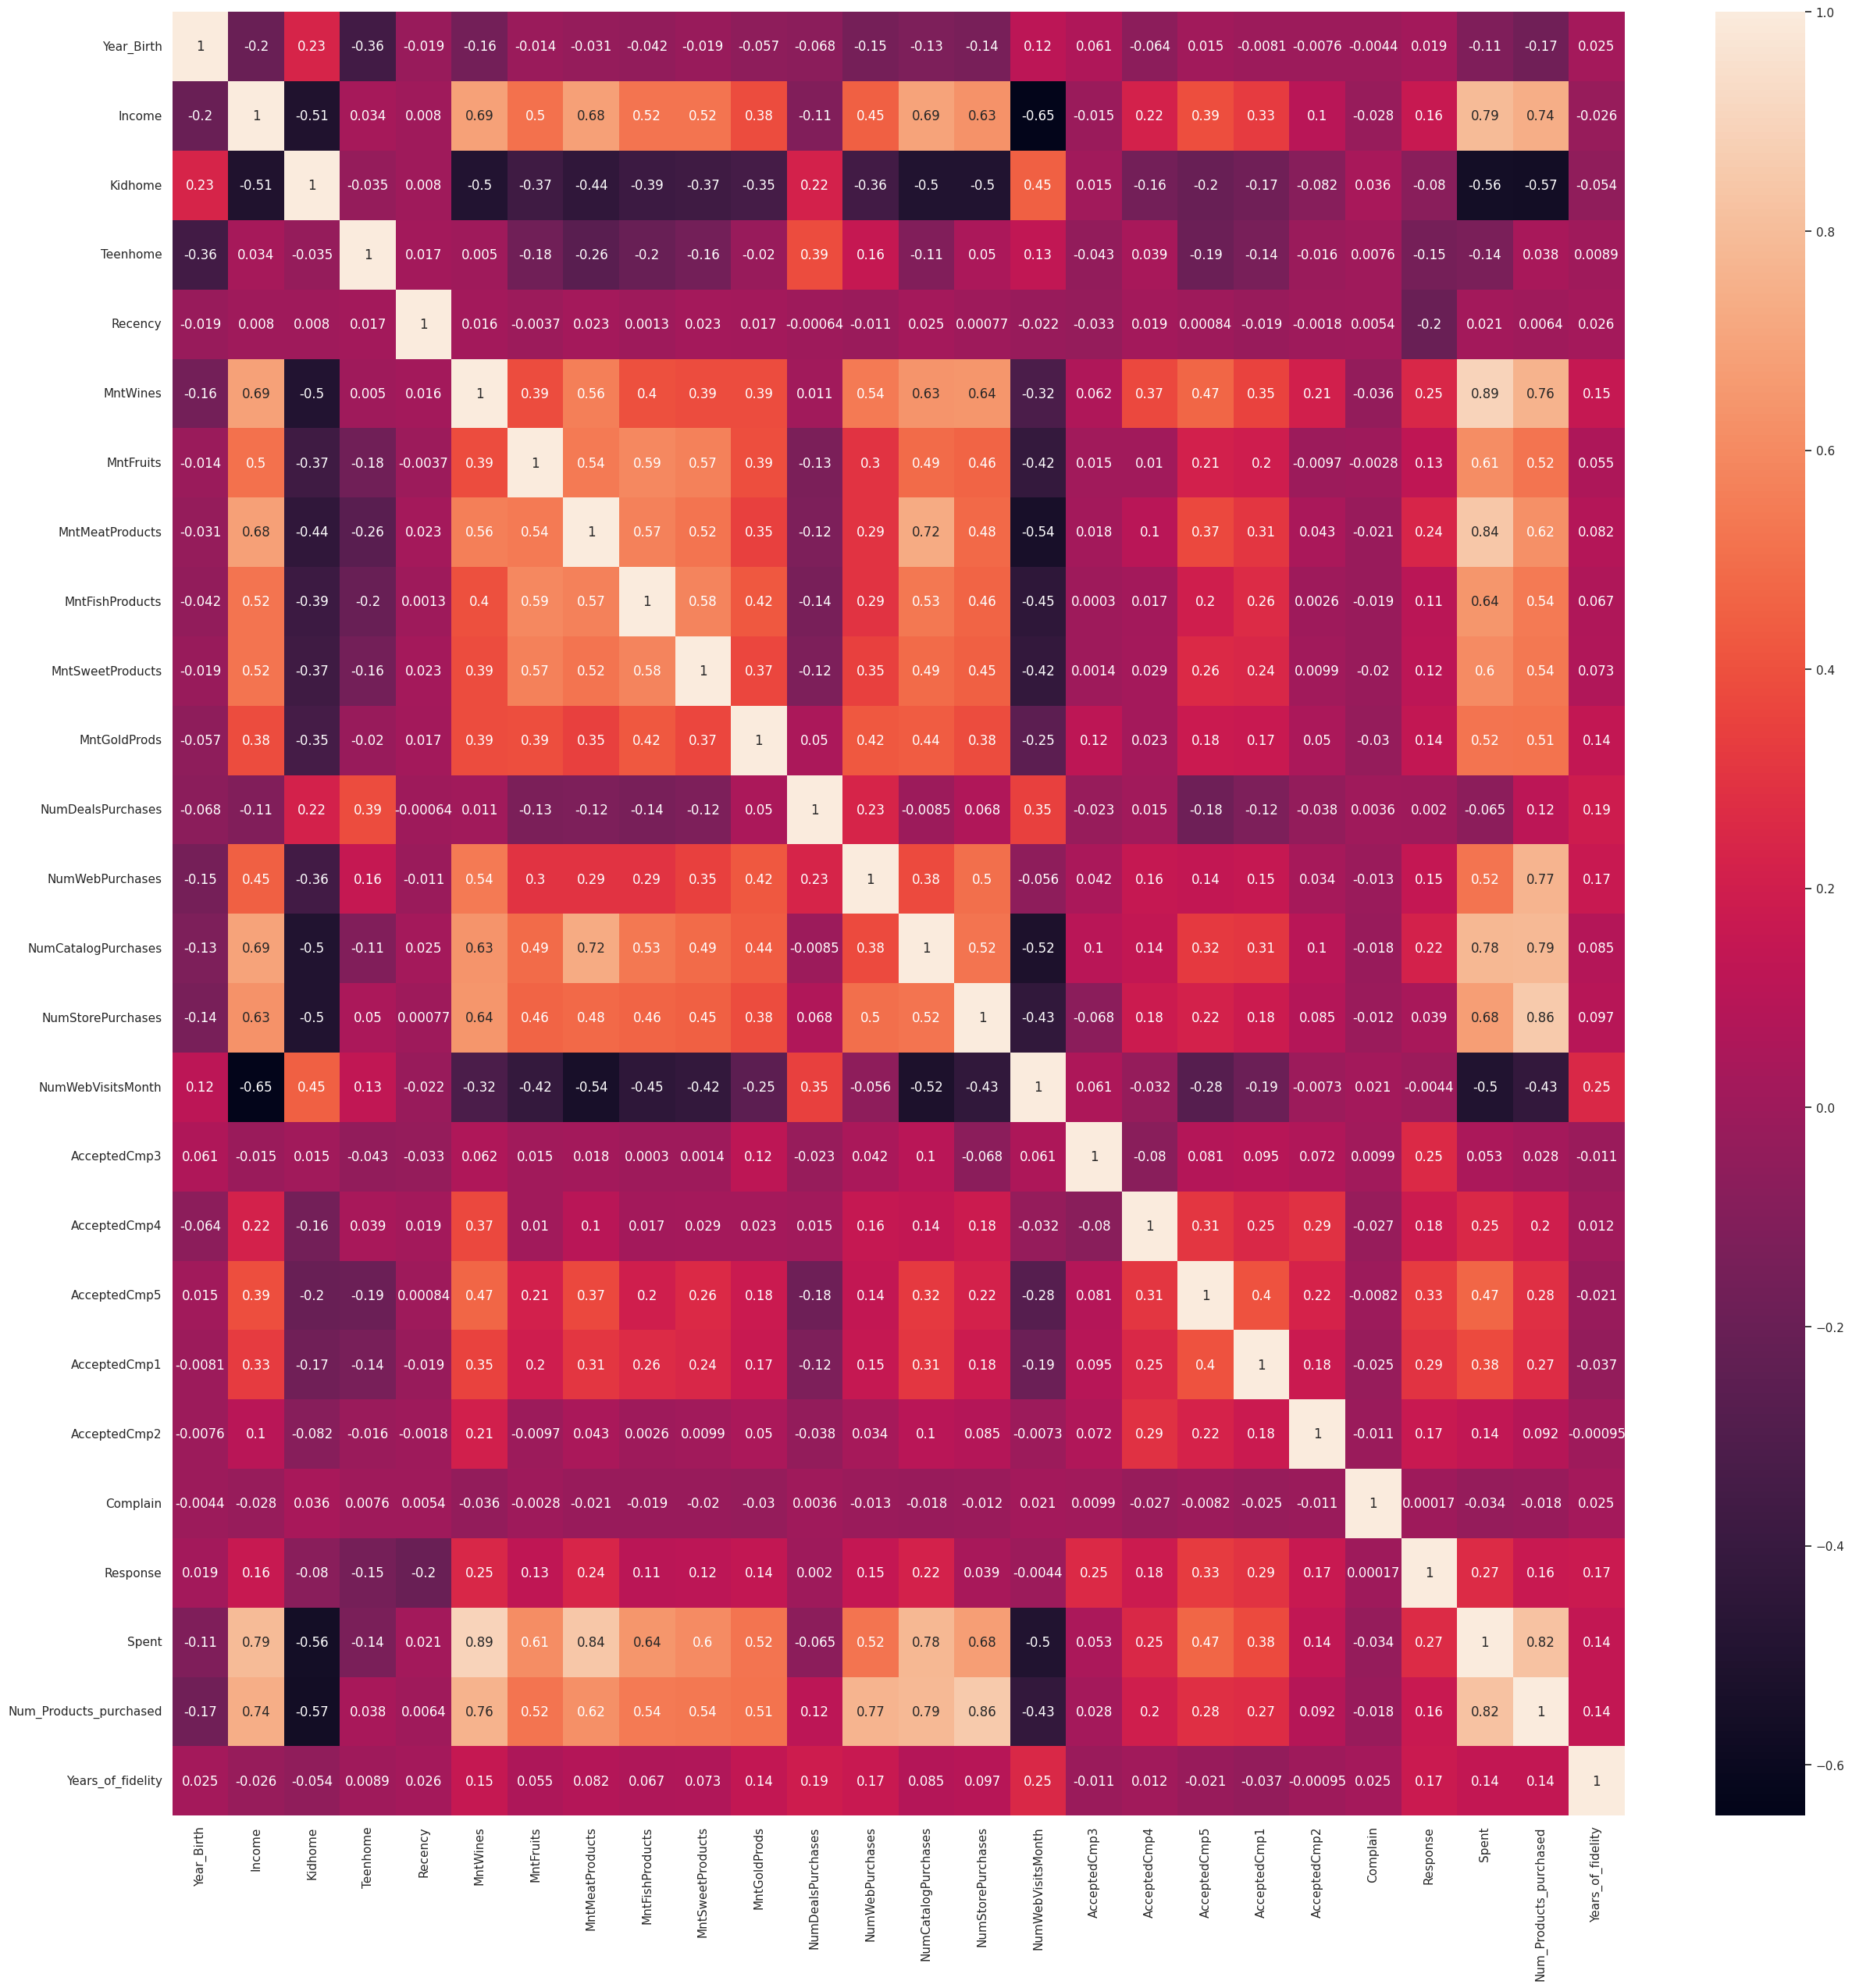

In [ ]:
sns.heatmap(df_num_corr,annot=True)
sns.set(rc={'figure.figsize':(30,30)})

In [ ]:
corr_mat = Store_data.corr()

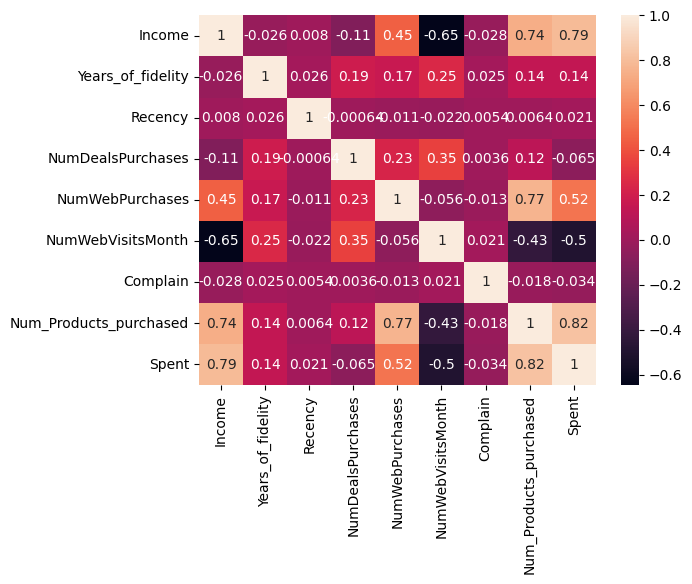

In [ ]:
sns.heatmap(corr_mat,annot=True)
sns.set(rc={'figure.figsize':(8,8)})


In [ ]:
Store_data.head()

,Income,Years_of_fidelity,Recency,NumDealsPurchases,NumWebPurchases,NumWebVisitsMonth,Complain,Num_Products_purchased,Spent
0,58138.0,12,58,3,8,7,0,22,1617
1,46344.0,10,38,2,1,5,0,4,27
2,71613.0,11,26,1,8,4,0,20,776
3,26646.0,10,26,2,2,6,0,6,53
4,58293.0,10,94,5,5,5,0,14,422


In [ ]:
Store_data.describe()

,Income,Years_of_fidelity,Recency,NumDealsPurchases,NumWebPurchases,NumWebVisitsMonth,Complain,Num_Products_purchased,Spent
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,51961.906544,10.972272,49.116279,2.326029,4.087657,5.318873,0.008945,12.546512,605.986583
std,21411.404811,0.684857,28.957284,1.933032,2.779988,2.426886,0.094173,7.206577,601.865156
min,1730.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,35502.500000,11.000000,24.000000,1.000000,2.000000,3.000000,0.000000,6.000000,69.000000
50%,51684.000000,11.000000,49.000000,2.000000,4.000000,6.000000,0.000000,12.000000,396.500000
75%,68275.750000,11.000000,74.000000,3.000000,6.000000,7.000000,0.000000,18.000000,1045.500000
max,162397.000000,12.000000,99.000000,15.000000,27.000000,20.000000,1.000000,32.000000,2525.000000


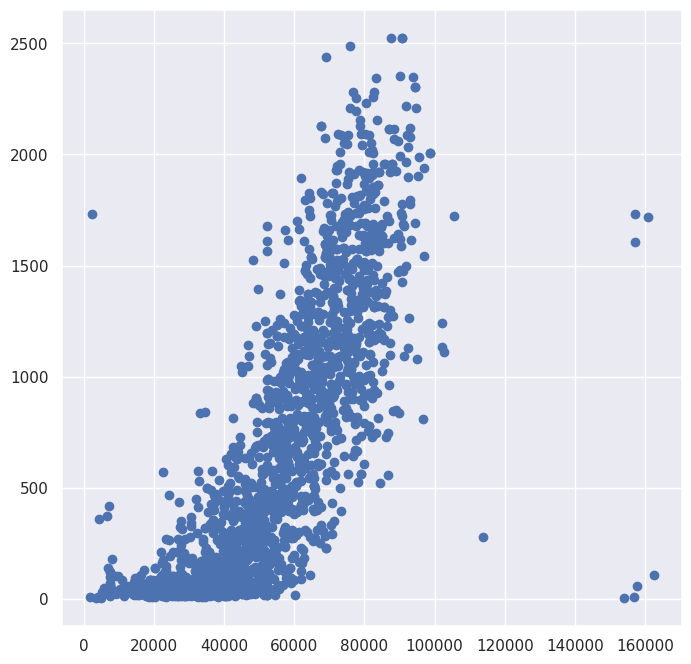

In [ ]:
plt.plot(Store_data['Income'],Store_data['Spent'],'o')

In [ ]:
df_numeric.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Spent',
       'Num_Products_purchased', 'Years_of_fidelity'],
      dtype='object')

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Spent',
       'Num_Products_purchased', 'Years_of_fidelity'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

categorical_columns = [
    'Marital_Status', 'Education']

encoder = OneHotEncoder(sparse=False)
encoded_categorical = pd.DataFrame(encoder.fit_transform(df[categorical_columns]))

encoded_categorical.columns = encoder.get_feature_names_out(categorical_columns)

df_prepared = pd.concat([df_numeric, encoded_categorical], axis=1)


In [ ]:
df_prepared.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spent,Num_Products_purchased,Years_of_fidelity,Marital_Status_In Couple,Marital_Status_Single,Education_Postgraduate,Education_Undergraduate
0,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1617.0,22.0,12.0,0.0,1.0,1.0,0.0
1,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,4.0,10.0,0.0,1.0,1.0,0.0
2,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,776.0,20.0,11.0,1.0,0.0,1.0,0.0
3,1984.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,6.0,10.0,1.0,0.0,1.0,0.0
4,1981.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,422.0,14.0,10.0,1.0,0.0,1.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ID                      2236 non-null   int64         
 1   Year_Birth              2236 non-null   int64         
 2   Education               2236 non-null   object        
 3   Marital_Status          2236 non-null   object        
 4   Income                  2236 non-null   float64       
 5   Kidhome                 2236 non-null   int64         
 6   Teenhome                2236 non-null   int64         
 7   Dt_Customer             2236 non-null   datetime64[ns]
 8   Recency                 2236 non-null   int64         
 9   MntWines                2236 non-null   int64         
 10  MntFruits               2236 non-null   int64         
 11  MntMeatProducts         2236 non-null   int64         
 12  MntFishProducts         2236 non-null   int64        

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_prepared)

In [ ]:
df_prepared[df_prepared.isnull().any(axis=1)]

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spent,Num_Products_purchased,Years_of_fidelity,Marital_Status_In Couple,Marital_Status_Single,Education_Postgraduate,Education_Undergraduate,Cluster


In [ ]:
df_prepared = df_prepared.dropna()

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_prepared)

df_prepared['Cluster'] = kmeans.labels_


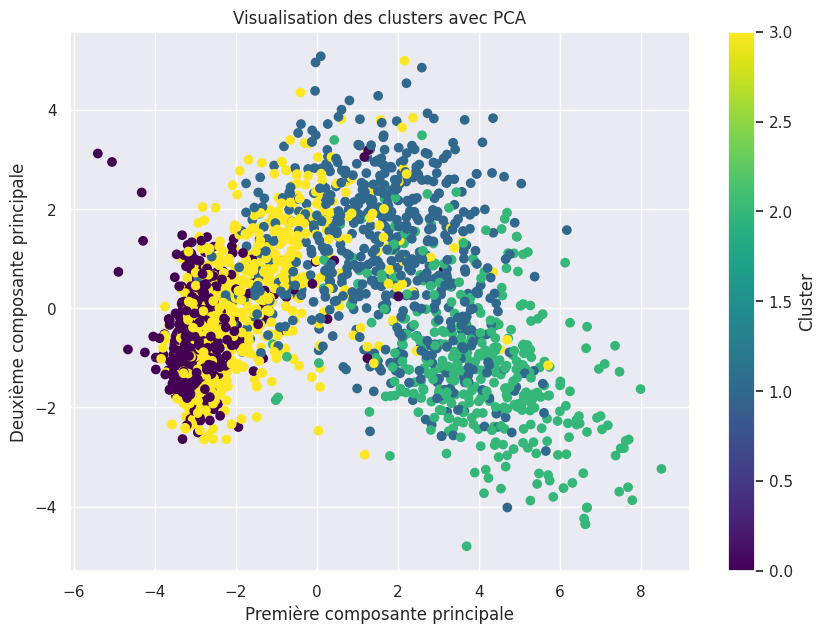

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Visualisation des clusters avec PCA')
plt.xlabel('Première composante principale')
plt.ylabel('Deuxième composante principale')
plt.colorbar(label='Cluster')
plt.show()


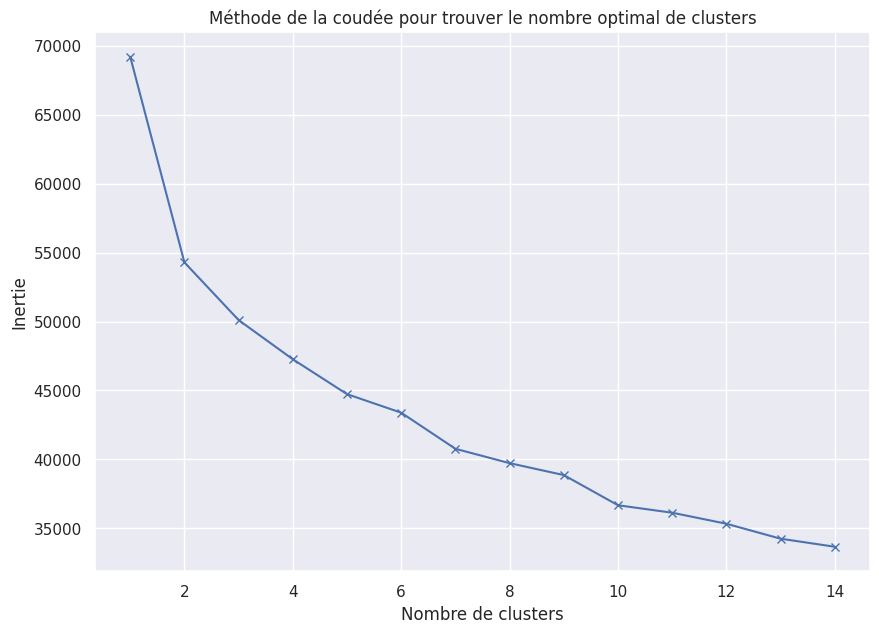

In [ ]:
from sklearn.cluster import KMeans

inertia = []
K = range(1, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 7))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode de la coudée pour trouver le nombre optimal de clusters')
plt.show()


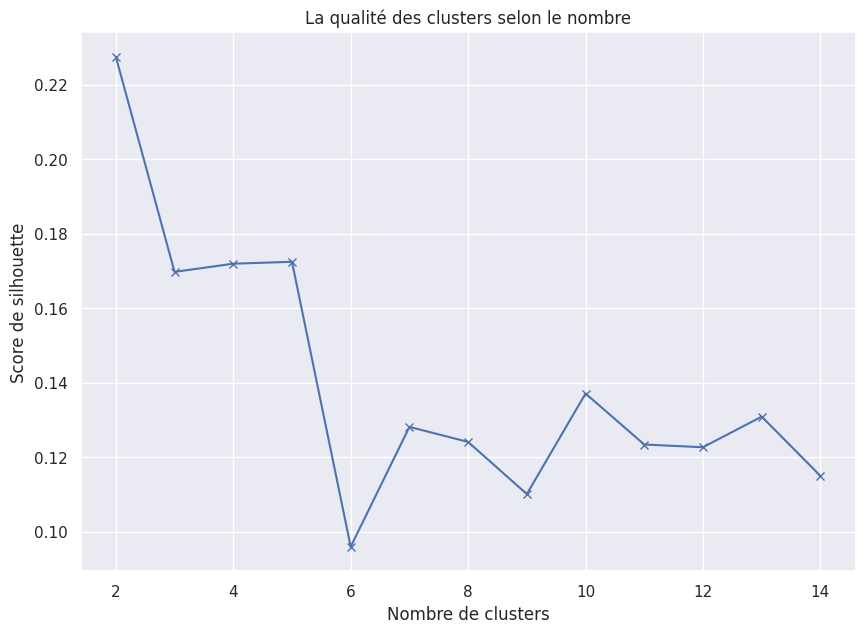

In [ ]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
K = range(2, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    score = silhouette_score(df_scaled, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 7))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('Nombre de clusters')
plt.ylabel('Score de silhouette')
plt.title('La qualité des clusters selon le nombre')
plt.show()


In [ ]:
df_prepared.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spent,Num_Products_purchased,Years_of_fidelity,Marital_Status_In Couple,Marital_Status_Single,Education_Postgraduate,Education_Undergraduate,Cluster
0,1957.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1617.0,22.0,12.0,0.0,1.0,1.0,0.0,1
1,1954.0,46344.0,1.0,1.0,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0,4.0,10.0,0.0,1.0,1.0,0.0,0
2,1965.0,71613.0,0.0,0.0,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,776.0,20.0,11.0,1.0,0.0,1.0,0.0,1
3,1984.0,26646.0,1.0,0.0,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0,6.0,10.0,1.0,0.0,1.0,0.0,0
4,1981.0,58293.0,1.0,0.0,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,422.0,14.0,10.0,1.0,0.0,1.0,0.0,1


In [ ]:
df_prepared.groupby('Cluster').mean()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Spent,Num_Products_purchased,Years_of_fidelity,Marital_Status_In Couple,Marital_Status_Single,Education_Postgraduate,Education_Undergraduate
Cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1974.134000,24177.364000,0.792000,0.228000,47.996000,19.318000,5.776000,21.822000,8.372000,5.800000,16.462000,2.028000,1.980000,0.460000,2.942000,7.034000,0.080000,0.002000,0.000000,0.000000,0.000000,0.010000,0.100000,77.550000,5.382000,10.994000,0.640000,0.360000,0.868000,0.132000
1,1966.016923,63432.473846,0.186154,0.709231,48.309231,482.970769,37.536923,214.309231,51.420000,37.169231,63.140000,2.729231,5.660000,3.783077,8.044615,4.555385,0.040000,0.112308,0.035385,0.047692,0.018462,0.007692,0.115385,886.546154,17.487692,11.021538,0.646154,0.353846,0.889231,0.110769
2,1968.022843,82988.786802,0.073604,0.236041,50.147208,659.464467,64.220812,470.969543,91.921320,67.751269,70.573604,1.274112,5.256345,6.065990,8.256345,2.680203,0.096447,0.157360,0.347716,0.269036,0.035533,0.005076,0.317259,1424.901015,19.578680,10.895939,0.637056,0.362944,0.901015,0.098985
3,1968.372093,43497.590164,0.645349,0.671512,50.104651,137.767442,8.840116,53.893895,14.521802,9.818314,30.747093,2.758721,3.460756,1.257267,4.322674,6.302326,0.085756,0.043605,0.002907,0.008721,0.005814,0.011628,0.120640,255.588663,9.040698,10.956395,0.651163,0.348837,0.886628,0.113372
